## School project - 5MLDE

The following notebook was created for a school project to create an anime recommendation system. The subject and the questions are available in the appendix.

The group members who participated in this project are:

    AMIMI Lamine
    BEZIN Théo
    LECOMTE Alexis
    PAWLOWSKI Maxence


## 1 - Data analysis

In [1]:
# OS and filesystem
from pathlib import Path

# Data
import pandas
from matplotlib import pyplot
import matplotx

# Console output
from colorama import Fore, Style

# from pandas_profiling import ProfileReport


In [2]:
pyplot.rcParams.update(pyplot.rcParamsDefault)
pyplot.style.use(matplotx.styles.dracula)  # Set the matplotlib style

In [3]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()
MODELS_FOLDER = (PARENT_FOLDER / ".." / ".." / "models").resolve()

# Plots
FIG_SIZE = (12, 7)

# Misc.
RANDOM_STATE = 2077

### Dataset loading

In [25]:
data_android = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"), index_col=0, delimiter=",", dtype={
    "Flow ID": str,
    "Source IP": str,
    "Source Port": int,
    "Destination IP": str,
    "Destination Port": int,
    "Protocol": float,
    "Timestamp": str,
    "Flow Duration": float,
    "Total Fwd Packets": float,
    "Total Backward Packets": float,
    "Total Length of Fwd Packets": float,
    "Total Length of Bwd Packets": float,
    "Fwd Packet Length Max": float,
    "Fwd Packet Length Min": float,
    "Fwd Packet Length Mean": float,
    "Fwd Packet Length Std": float,
    "Bwd Packet Length Max": float,
    "Bwd Packet Length Min": float,
    "Bwd Packet Length Mean": float,
    "Bwd Packet Length Std": float,
    "Flow Bytes/s": float,
    "Flow Packets/s": float,
    "Flow IAT Mean": float,
    "Flow IAT Std": float,
    "Flow IAT Max": float,
    "Flow IAT Min": float,
    "Fwd IAT Total": float,
    "Fwd IAT Mean": float,
    "Fwd IAT Std": float,
    "Fwd IAT Max": float,
    "Fwd IAT Min": float,
    "Bwd IAT Total": float,
    "Bwd IAT Mean": float,
    "Bwd IAT Std": float,
    "Bwd IAT Max": float,
    "Bwd IAT Min": float,
    "Fwd PSH Flags": float,
    "Bwd PSH Flags": float,
    "Fwd URG Flags": float,
    "Bwd URG Flags": float,
    "Fwd Header Length": float,
    "Bwd Header Length": float,
    "Fwd Packets/s": float,
    "Bwd Packets/s": float,
    "Min Packet Length": float,
    "Max Packet Length": float,
    "Packet Length Mean": float,
    "Packet Length Std": float,
    "Packet Length Variance": float,
    "FIN Flag Count": float,
    "SYN Flag Count": float,
    "RST Flag Count": float,
    "PSH Flag Count": float,
    "ACK Flag Count": float,
    "URG Flag Count": float,
    "CWE Flag Count": str,  # Change later
    "ECE Flag Count": float,
    "Down/Up Ratio": str,  # Change later
    "Average Packet Size": float,
    "Avg Fwd Segment Size": float,
    "Avg Bwd Segment Size": float,
    "Fwd Header Length.1": float,
    "Fwd Avg Bytes/Bulk": float,
    "Fwd Avg Packets/Bulk": float,
    "Fwd Avg Bulk Rate": float,
    "Bwd Avg Bytes/Bulk": float,
    "Bwd Avg Packets/Bulk": float,
    "Bwd Avg Bulk Rate": float,
    "Subflow Fwd Packets": float,
    "Subflow Fwd Bytes": float,
    "Subflow Bwd Packets": float,
    "Subflow Bwd Bytes": float,
    "Init_Win_bytes_forward": float,
    "Init_Win_bytes_backward": float,
    "act_data_pkt_fwd": float,
    "min_seg_size_forward": float,
    "Active Mean": float,
    "Active Std": float,
    "Active Max": float,
    "Active Min": float,
    "Idle Mean": float,
    "Idle Std": float,
    "Idle Max": float,
    "Idle Min": float,
    "Label": str
})
data_android.columns = data_android.columns.str.strip()
data_android

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\parsers.pyx", line 1124, in pandas._libs.parsers.TextReader._convert_tokens
TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\alexi\miniconda3\envs\5MLRE\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alexi\AppData\Local\Temp\ipykernel_12712\1283897203.py", line 1, in <module>
    data_android = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"), index_col=0, delimiter=",", dtype={
  File "C:\Users\alexi\miniconda3\envs\5MLRE\lib\site-packages\pandas\util\_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\alexi\miniconda3\envs\5MLRE\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
    return func(*args, **k

#### Duplicated values

In [ ]:
def duplicated_values(df, df_name: str = None) -> None:
    # Compute the dataset size, the count of duplicated value and the list of duplicated values
    data_count = df.shape[0] * df.shape[1]
    duplicated_count = df.duplicated().sum()
    duplicated = df[df.duplicated(keep=False)] if (duplicated_count > 0) else None

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print(f"{Style.BRIGHT}Duplicated values{df_name}:{Style.RESET_ALL} {duplicated_count} ({round((duplicated_count.sum() / data_count) * 100, 2)}%)")
    if duplicated is not None:
        print(duplicated)


duplicated_values(df=data_android)

There is only 0.01% of duplicated values, we can afford to delete the rows where there are duplicated values

In [26]:
data_android.drop_duplicates(keep="first", inplace=True)

#### Null and empty values

In [27]:
def missing_values(df, df_name: str = None, keep_zeros=True) -> None:
    # Compute the dataset size and the count of missing value
    data_count = df.shape[0] * df.shape[1]
    missing = missing_df = df.isna().sum()

    # Filter out column with zero missing value
    if not keep_zeros:
        missing_df = missing_df[missing_df > 0]

    # Calculate the percent of missing values
    missing_df = missing_df.sort_values(ascending=False).apply(lambda m: f"{m} ({round((m * 100) / df.shape[0], 2)}%)")

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print((
        f"{Style.BRIGHT}Missing values{df_name}:{Style.RESET_ALL} {round((missing.sum() / data_count) * 100, 2)}%\n"
        f"{Style.DIM}{Fore.WHITE}{missing_df}{Style.RESET_ALL}"
    ))


missing_values(df=data_android, keep_zeros=True)

Missing values: 0.0%
Fwd Avg Bulk Rate       4 (0.0%)
act_data_pkt_fwd        4 (0.0%)
Fwd Avg Packets/Bulk    4 (0.0%)
Bwd Avg Bytes/Bulk      4 (0.0%)
Bwd Avg Packets/Bulk    4 (0.0%)
                          ...   
Fwd IAT Mean            0 (0.0%)
Fwd IAT Total           0 (0.0%)
Flow IAT Min            0 (0.0%)
Flow IAT Max            0 (0.0%)
Label                   0 (0.0%)
Length: 85, dtype: object


We can see only a very few amount of missing values, we can drop the only lines where there are missing values


In [28]:
data_android.Label.value_counts()

Android_Adware         147443
Android_Scareware      117070
Android_SMS_Malware     64524
Benign                  23708
Name: Label, dtype: int64

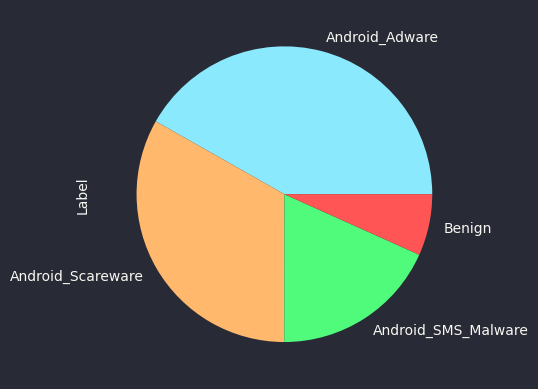

In [29]:
data_android.Label.value_counts().plot(kind="pie")
pyplot.show()

In [30]:
# results = ProfileReport(data_android.head(20000), title="Android Malware Pandas Profiling Report")
# results.to_file('report.html')

In [32]:
# clean object columns
data_android['CWE Flag Count'] =  data_android['CWE Flag Count'].fillna(0)
data_android.drop(data_android.loc[data_android['CWE Flag Count'] == 'SCAREWARE'].index, inplace=True)
data_android['CWE Flag Count'] = data_android['CWE Flag Count'].astype(int)
data_android['CWE Flag Count'].value_counts(normalize=True)

0    1.0
Name: CWE Flag Count, dtype: float64

In [33]:
data_android.drop(data_android.loc[data_android['Fwd Avg Bytes/Bulk'] == 'BENIGN'].index, inplace=True)
data_android['Fwd Avg Bytes/Bulk'] = data_android['Fwd Avg Bytes/Bulk'].astype(float)
data_android['Fwd Avg Bytes/Bulk'].value_counts(normalize=True)

0.0    1.0
Name: Fwd Avg Bytes/Bulk, dtype: float64

In [34]:
data_android.drop(data_android.loc[data_android['Down/Up Ratio'] == 'BENIGN'].index, inplace=True)
data_android['Down/Up Ratio'] = data_android['Down/Up Ratio'].astype(float)
data_android['Down/Up Ratio'].value_counts(normalize=True)

0.0     0.491642
1.0     0.474098
2.0     0.025271
3.0     0.006672
4.0     0.001435
5.0     0.000406
6.0     0.000150
8.0     0.000125
7.0     0.000099
12.0    0.000037
9.0     0.000023
10.0    0.000020
11.0    0.000020
75.0    0.000003
Name: Down/Up Ratio, dtype: float64

In [35]:
data_android.drop(["Flow ID"], axis=1, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

data_x = data_android.drop(["Label"], axis=1)
data_y = data_android["Label"]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)
print(f"Données d'entraînement : {Fore.LIGHTGREEN_EX}{x_train.shape}{Fore.RESET}")
print(f"Données de test : {Fore.LIGHTGREEN_EX}{x_test.shape}{Fore.RESET}")

Données d'entraînement : (282032, 83)
Données de test : (70508, 83)


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


numeric_features = ["Source Port", "Destination Port", "Protocol", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min"]
categorical_features = ["Source IP", "Destination IP", "Timestamp"]

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)
# preprocessor.fit_transform(data_x)

In [42]:
data_y.value_counts()

Android_Adware         147351
Android_Scareware      116989
Android_SMS_Malware     64492
Benign                  23708
Name: Label, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("k_neighbors_classifier", KNeighborsClassifier())
])

pipeline.fit(x_train, y_train)

print((
    f"Model score:\n"
    f"\t{Fore.WHITE}{Style.DIM}∟ train → {round(pipeline.score(x_train, y_train) * 100, 2)}%{Fore.WHITE}{Style.DIM})\n"
    f"\t{Fore.WHITE}{Style.DIM}∟ test → {round(pipeline.score(x_test, y_test) * 100, 2)}%{Fore.WHITE}{Style.DIM})"
))


In [ ]:
import pickle

with (MODELS_FOLDER / "model.ckp").open(mode="wb") as dump_file:
    pickle.dump(pipeline["k_neighbors_classifier"], dump_file)